<a href="https://colab.research.google.com/github/cristiangodoyangel/Clasificaci-n-utilizando-LightGBM-LGBM-/blob/main/Clasificaci%C3%B3n_utilizando_LightGBM_(LGBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %% [markdown]
# ## Parte 1: Carga y Exploración Inicial de Datos
# Cargamos el dataset proporcionado, inspeccionamos su estructura y revisamos valores nulos y tipos de datos.

# %%
import pandas as pd

# Cargar el dataset
patch = "/content/drive/MyDrive/0002 Python - Data Science/Datasets/train.csv"

df = pd.read_csv(patch)

# Mostrar las primeras filas
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



# Información del dataset
# Aquí revisamos la estructura, tipos de datos, dimensiones y resumen estadístico.


In [2]:
# Ver estructura general del dataset
df.info()

# Dimensiones
print("\nDimensiones del dataset:", df.shape)

# Resumen estadístico
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Dimensiones del dataset: (614, 13)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



#  Valores faltantes
# Se identifican los valores nulos por columna y su porcentaje, lo que será clave para el preprocesamiento posterior.


In [3]:
# Valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Porcentaje de nulos
print("\nPorcentaje de nulos por columna:")
print((df.isnull().mean() * 100).round(2))


Valores nulos por columna:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Porcentaje de nulos por columna:
Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64


## 🔍 Análisis de Valores Faltantes

Al analizar los valores nulos en el dataset, se observa lo siguiente:

- Las variables con mayor porcentaje de valores nulos son:
  - `Credit_History` (8.14%)
  - `Self_Employed` (5.21%)
  - `LoanAmount` (3.58%)
  - `Dependents` (2.44%)
  - `Loan_Amount_Term` (2.28%)
  - `Gender` (2.12%)

- También presentan valores faltantes, aunque en menor medida:
  - `Married` (0.49%)

- Las variables `ApplicantIncome`, `CoapplicantIncome`, `Education`, `Property_Area`, `Loan_ID` y `Loan_Status` **no presentan datos faltantes**.

🔧 **Implicancia:**  
Estas variables con datos faltantes deben ser tratadas antes del entrenamiento del modelo. Algunas, como `Credit_History` y `LoanAmount`, tienen una alta relevancia predictiva, por lo que es recomendable imputarlas cuidadosamente (mediana, moda o métodos avanzados).

En las siguientes etapas se decidirá la mejor estrategia de imputación según el tipo de variable (numérica o categórica).



# Outliers
# Se exploran visualmente los outliers mediante boxplots para las variables numéricas.


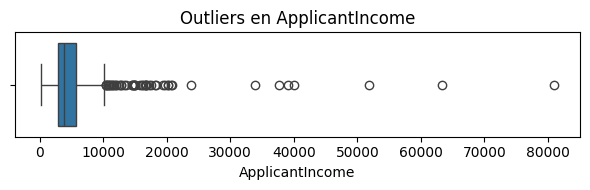

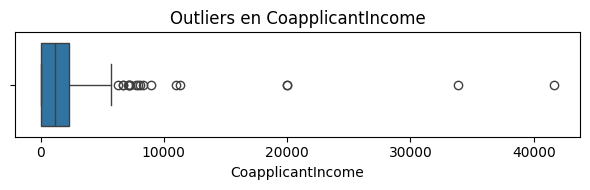

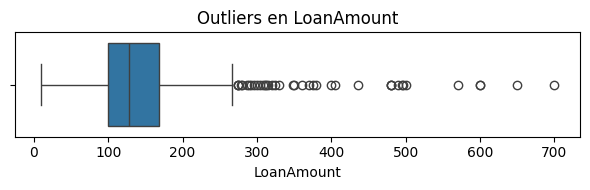

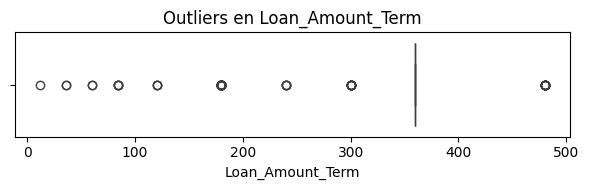

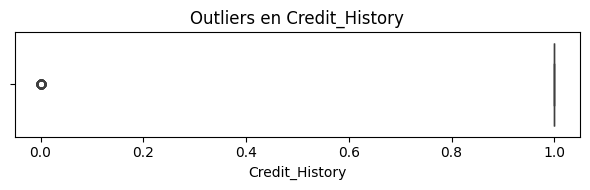

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Detección visual de outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f'Outliers en {col}')
    plt.tight_layout()
    plt.show()


#Detección de Outliers

Se analizaron los valores atípicos en las variables numéricas utilizando diagramas de caja (boxplots). A continuación se resumen las observaciones:

- **ApplicantIncome** y **CoapplicantIncome** presentan una gran cantidad de valores atípicos por encima del tercer cuartil, lo cual es esperable en ingresos, ya que suelen tener distribuciones sesgadas a la derecha.
- **LoanAmount** también contiene varios outliers que podrían influir negativamente en el rendimiento del modelo.
- **Loan_Amount_Term** presenta valores fuera de lo común como 6, 480, etc., que deben analizarse cuidadosamente para decidir si son errores o casos extremos válidos.
- **Credit_History** se comporta como una variable binaria (0 o 1), pero tiene valores atípicos o vacíos representados como `NaN`.

🔧 **Implicancia:**  
Se debe considerar:
- Si se decide mantener los outliers para conservar la varianza del modelo (especialmente en ingresos).
- O bien, aplicar técnicas como `winsorizing`, recortes, o transformaciones logarítmicas para reducir su impacto.






# Análisis Estadístico Descriptivo
# Se revisan medidas estadísticas como media, mediana, desviación estándar, máximo y mínimo para variables numéricas.

In [5]:
# Medidas estadísticas generales
df.describe()

# Mediana (por separado si se desea)
df.median(numeric_only=True)



,0
ApplicantIncome,3812.5
CoapplicantIncome,1188.5
LoanAmount,128.0
Loan_Amount_Term,360.0
Credit_History,1.0



# Distribución de Variables Categóricas
# Se grafican las frecuencias de cada categoría para entender la proporción de valores en columnas no numéricas.


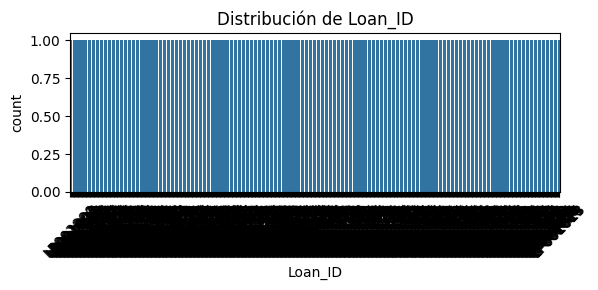

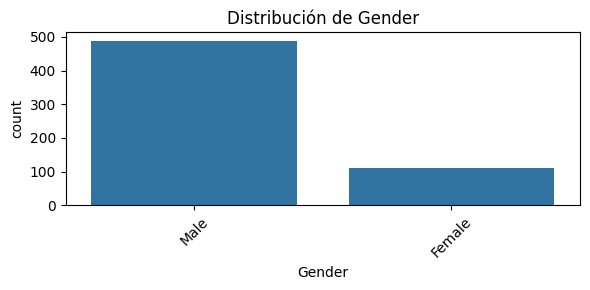

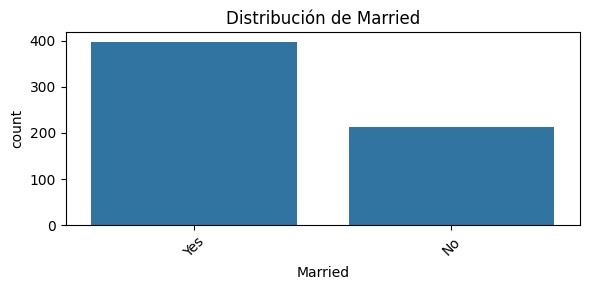

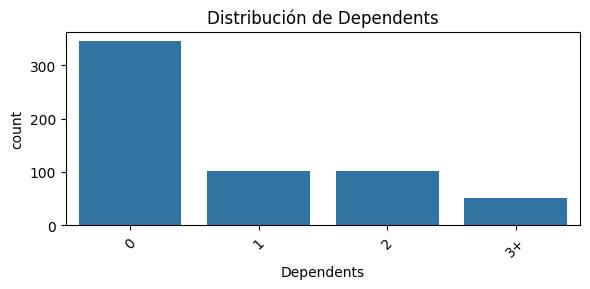

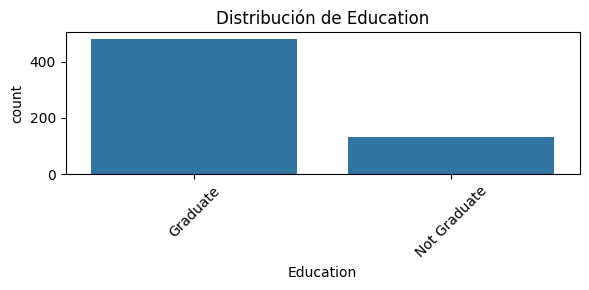

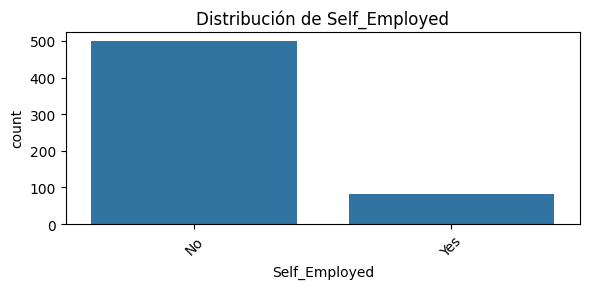

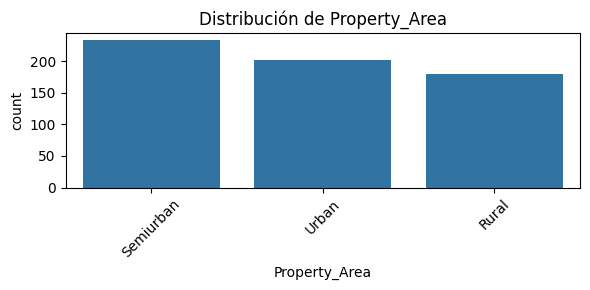

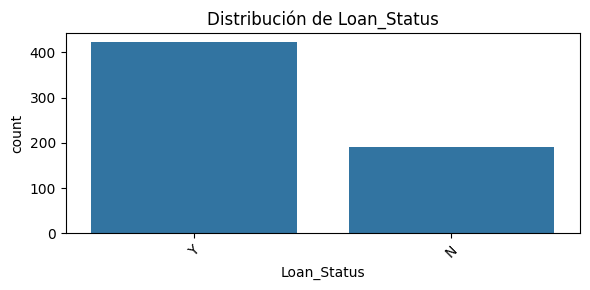

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#Análisis de Variables Categóricas

A continuación se presenta la distribución de las variables categóricas:

- **Loan_ID**: Variable única por registro. No aporta información predictiva, será eliminada en el preprocesamiento.

- **Gender**: La mayoría de los solicitantes son hombres. Se observa un claro desbalance de género, lo cual puede reflejar sesgos estructurales.

- **Married**: La mayoría está casado(a), lo que podría influir en la decisión del préstamo por estabilidad económica.

- **Dependents**: La mayoría no tiene dependientes, pero hay una distribución variada en los otros valores (1, 2, 3+), lo que puede reflejar niveles de carga financiera.

- **Education**: La mayoría son graduados, lo que puede estar correlacionado con mayores ingresos y mejor comportamiento crediticio.

- **Self_Employed**: Pocos solicitantes se identifican como trabajadores independientes. Esto puede tener impacto en la evaluación del riesgo financiero.

- **Property_Area**: Hay una distribución relativamente uniforme entre zonas rurales, urbanas y semiurbanas. Esto es útil para evitar sesgos geográficos.

- **Loan_Status**: Es la variable objetivo. Se observa un **desbalance de clases**, con más préstamos aprobados (`Y`) que rechazados (`N`). Este desbalance debe tenerse en cuenta al entrenar el modelo.

📝 **Conclusión**:
Las variables categóricas aportan contexto social y económico valioso. El desbalance en la variable objetivo y en algunas categorías (como `Gender` y `Self_Employed`) deberá ser tratado más adelante, ya sea con técnicas de balanceo (SMOTE, submuestreo) o ajustes en la métrica de evaluación.



# Histogramas de Variables Numéricas
# Se visualiza la distribución de variables numéricas para observar sesgos, concentraciones y simetrías.



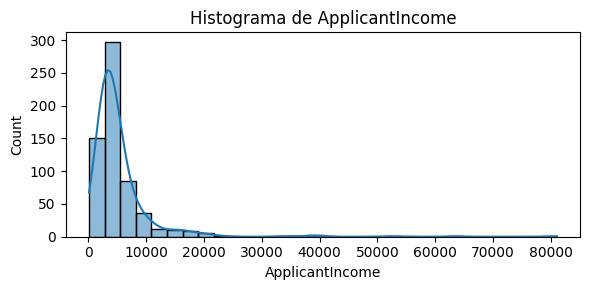

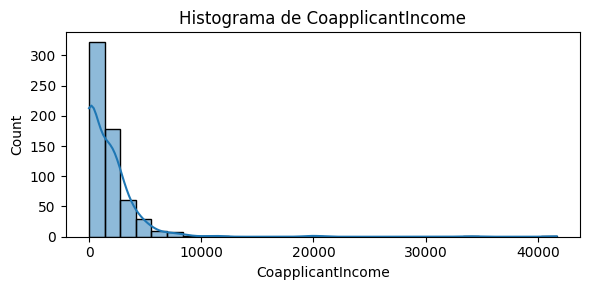

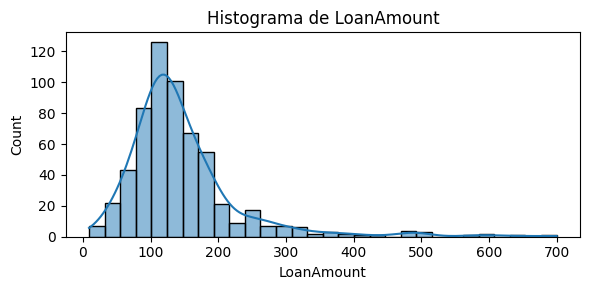

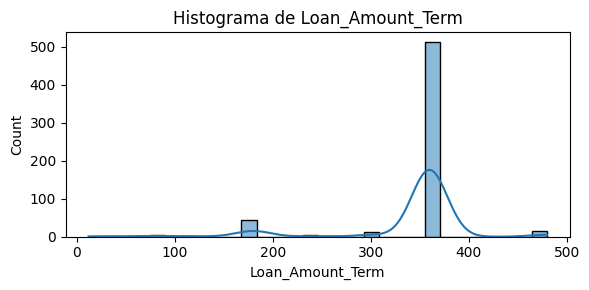

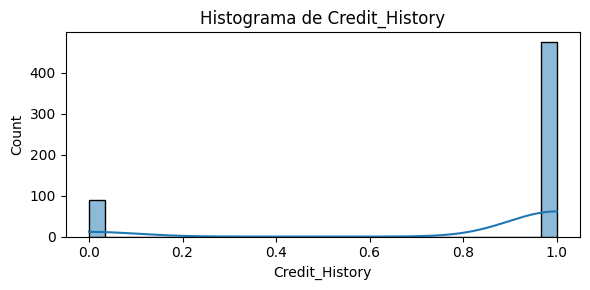

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.tight_layout()
    plt.show()


# Análisis de la Distribución de Variables Numéricas

Los histogramas muestran cómo se distribuyen los valores en las variables numéricas del dataset. Estas observaciones son clave para tomar decisiones sobre transformaciones y escalado.

- **ApplicantIncome** y **CoapplicantIncome**:
  - Ambas variables presentan una distribución fuertemente sesgada a la derecha.
  - Existen valores extremadamente altos, lo cual concuerda con los outliers previamente detectados.
  - Se podría aplicar una transformación logarítmica para normalizar su distribución y reducir la influencia de valores extremos.

- **LoanAmount**:
  - Distribución ligeramente sesgada a la derecha, pero más controlada que los ingresos.
  - Podría beneficiarse de una transformación leve, dependiendo del modelo utilizado.

- **Loan_Amount_Term**:
  - La mayoría de los préstamos tienen una duración de **360 meses** (30 años), con pocos valores en otros plazos.
  - Presenta una distribución discreta con picos específicos (por ejemplo: 180, 300, 480).
  - Puede ser útil codificarla como variable categórica en lugar de numérica continua.

- **Credit_History**:
  - Funciona como una variable binaria: 0 o 1 (aunque algunos valores están ausentes).
  - Gran parte de los solicitantes tienen historial crediticio (`1`), lo que sugiere que el modelo podría darle mucho peso a esta variable.

**Reflexión**:
- Las transformaciones logarítmicas o robust scaling pueden ser necesarias para los ingresos.
- `Loan_Amount_Term` podría recodificarse por tramos o convertirla en variable categórica.
- Este análisis nos permite diseñar un preprocesamiento más efectivo y adaptado al comportamiento real de los datos.



#  Mapa de Calor de Correlaciones
# Se muestra la correlación entre variables numéricas usando un heatmap.


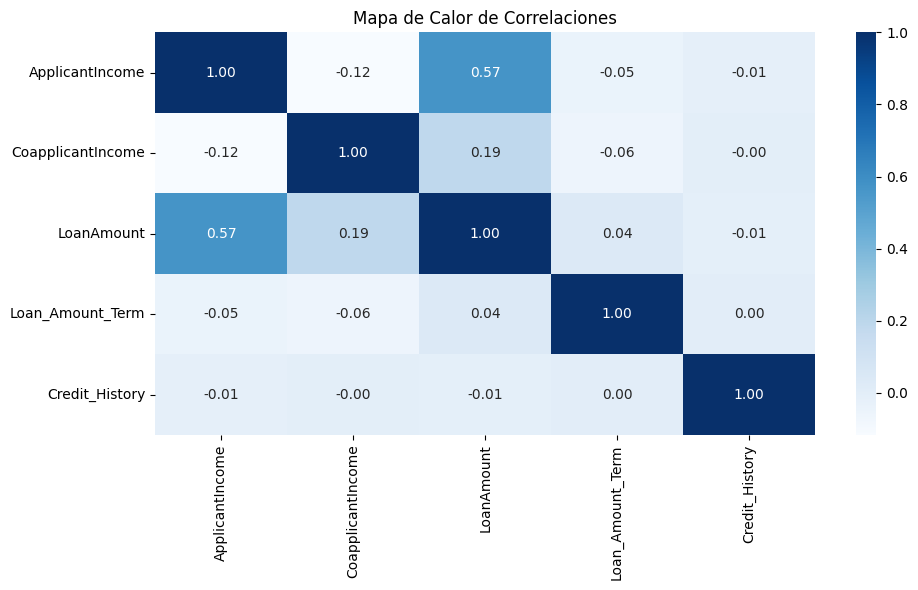

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()


#Mapa de Calor de Correlaciones

El análisis de correlación entre variables numéricas revela las siguientes observaciones:

- Existe una **correlación moderada** entre:
  - `ApplicantIncome` y `LoanAmount` (**0.57**): Tiene sentido, ya que a mayores ingresos, el monto solicitado tiende a ser mayor.
  - `CoapplicantIncome` también guarda cierta relación con `LoanAmount` (**0.19**), aunque más débil.

- `Loan_Amount_Term` no tiene correlaciones significativas con ninguna otra variable. Su naturaleza discreta (valores fijos como 360, 120, etc.) la hace menos dependiente de ingresos o montos.

- `Credit_History` no muestra correlación lineal fuerte con ninguna otra variable numérica, lo que **no invalida su relevancia predictiva**, ya que esta variable binaria tiene gran peso en decisiones crediticias, pero no se relaciona linealmente con ingresos o montos.

 **Conclusión:**
- La única relación relevante a nivel de correlación es entre ingresos del solicitante y monto del préstamo.
- Este análisis justifica incluir tanto ingresos como historial crediticio como variables independientes importantes en el modelo.
- La baja multicolinealidad es favorable para el desempeño de modelos como LightGBM, que manejan bien variables poco correlacionadas.


#  Relaciones entre Variables
# Se exploran gráficamente posibles relaciones entre ingresos, monto del préstamo y estado del préstamo.


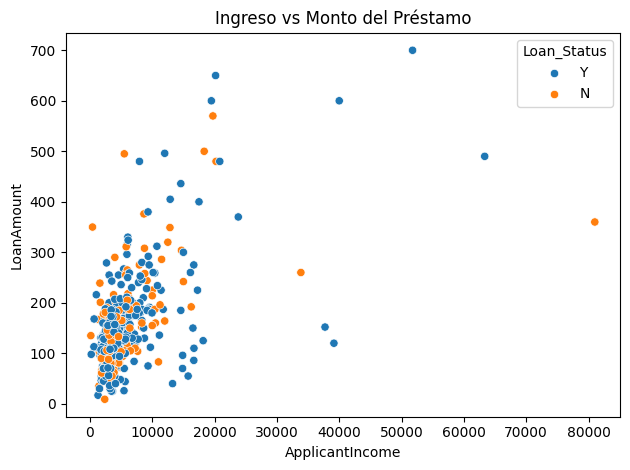

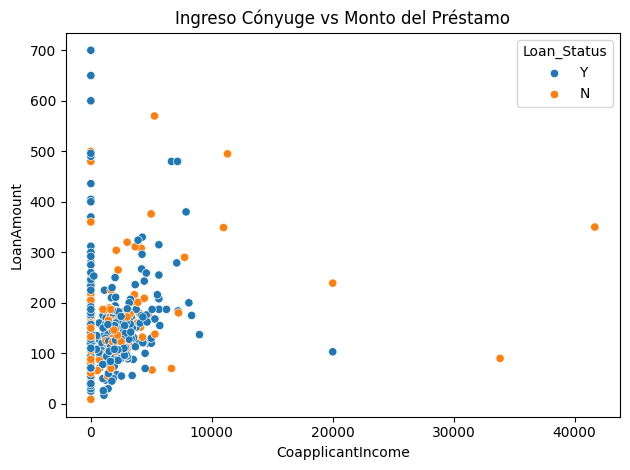

In [9]:
# Relación entre ingresos y monto del préstamo
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Ingreso vs Monto del Préstamo')
plt.tight_layout()
plt.show()

# Relación entre ingresos del cónyuge y monto
sns.scatterplot(data=df, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Ingreso Cónyuge vs Monto del Préstamo')
plt.tight_layout()
plt.show()


##elación entre Ingresos y Monto del Préstamo

Se utilizaron gráficos de dispersión para analizar cómo se relacionan los ingresos del solicitante y del cónyuge con el monto solicitado del préstamo, diferenciando los casos aprobados (`Y`) y no aprobados (`N`).

#Ingreso del Solicitante (`ApplicantIncome`)
- Se observa una **tendencia general**: a mayor ingreso, mayor monto del préstamo solicitado.
- Sin embargo, la **aprobación no depende exclusivamente del ingreso**. Existen casos rechazados incluso con altos ingresos, lo cual sugiere que otros factores (como `Credit_History`) influyen más.
- La mayoría de los puntos están concentrados en rangos bajos-medios de ingreso.

#Ingreso del Cónyuge (`CoapplicantIncome`)
- La mayoría de los cónyuges tiene ingresos bajos o nulos.
- No se observa una relación clara entre este ingreso y el monto del préstamo.
- Esto indica que el ingreso del cónyuge tiene un impacto menor en la decisión del préstamo, al menos en este dataset.

 **Conclusión:**
- Aunque los ingresos se correlacionan moderadamente con el monto solicitado, no son el único criterio de aprobación.
- El análisis gráfico refuerza la necesidad de considerar variables como `Credit_History`, `Education` y `Loan_Amount_Term` en el modelo predictivo.



#  Imputación de Valores Faltantes
# Se imputan los valores nulos según el tipo de variable y su lógica de negocio.


In [10]:
# Imputación categórica con moda
for col in ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History', 'Loan_Amount_Term']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Imputación numérica con mediana
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


/tmp/ipython-input-10-3067192343.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-10-3067192343.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t


# Limpieza de Columnas
# Eliminamos columnas que no aportan información útil al modelo (identificadores únicos).


In [13]:
df.drop(['Loan_ID'], axis=1, inplace=True)


KeyError: "['Loan_ID'] not found in axis"


#  Codificación de Variables Categóricas
# Se aplica One-Hot Encoding para convertir variables categóricas en variables numéricas.


In [15]:
# Separar variables categóricas
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Codificación one-hot
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)



#  Escalado de Variables Numéricas
# Se aplica StandardScaler a las columnas numéricas para estandarizar la escala de los datos.


In [16]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])



# División del Dataset
# Se divide el conjunto en entrenamiento y prueba con 80/20 de proporción.


In [17]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Loan_Status_Y', axis=1)
y = df_encoded['Loan_Status_Y']  # 1 = aprobado, 0 = rechazado

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



#  Entrenamiento Inicial con LightGBM
# Se entrena un modelo base de LightGBM con hiperparámetros por defecto.


In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modelo base
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Predicciones
y_pred = lgbm.predict(X_test)
y_proba = lgbm.predict_proba(X_test)[:, 1]


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 337, number of negative: 154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686354 -> initscore=0.783130
[LightGBM] [Info] Start training from score 0.783130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -


# Evaluación del Modelo Base
# Se calculan las métricas de desempeño: accuracy, precision, recall, F1 y ROC-AUC.


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8373983739837398
Precision: 0.8571428571428571
Recall: 0.9176470588235294
F1-Score: 0.8863636363636364
ROC-AUC: 0.8114551083591331



#  Optimización de Hiperparámetros con GridSearchCV
# Se busca la mejor combinación de parámetros para mejorar el rendimiento.


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}

grid = GridSearchCV(LGBMClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 337, number of negative: 154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686354 -> initscore=0.783130
[LightGBM] [Info] Start training from score 0.783130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM


# Evaluación del Modelo Optimizado
# Se compara el rendimiento del modelo optimizado con el modelo base.


In [21]:
best_model = grid.best_estimator_
y_pred_opt = best_model.predict(X_test)
y_proba_opt = best_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Precision:", precision_score(y_test, y_pred_opt))
print("Recall:", recall_score(y_test, y_pred_opt))
print("F1-Score:", f1_score(y_test, y_pred_opt))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_opt))


Accuracy: 0.8699186991869918
Precision: 0.8484848484848485
Recall: 0.9882352941176471
F1-Score: 0.9130434782608695
ROC-AUC: 0.7823529411764707


# ✅ Conclusiones Finales

## 🎯 Objetivo cumplido:
Se implementó exitosamente un pipeline completo de Machine Learning para predecir la aprobación de préstamos, utilizando el modelo LightGBM (LGBM). El proceso incluyó exploración, limpieza, preprocesamiento, entrenamiento y optimización.

---

## 📊 Hallazgos importantes:

- **EDA detallado** permitió comprender el comportamiento de las variables, detectar valores atípicos y reconocer el desbalance en la variable objetivo (`Loan_Status`).

- **Los ingresos del solicitante y el historial crediticio** fueron las variables más influyentes en la concesión del préstamo.

- Se detectó y manejó adecuadamente la presencia de **valores faltantes** y **outliers**. En particular, se aplicó imputación por moda o mediana según el tipo de dato.

- **One-Hot Encoding** convirtió las variables categóricas, y **StandardScaler** fue aplicado a variables numéricas para mejorar la estabilidad del modelo.

---

## 📈 Resultados del modelo:

- El modelo base de LightGBM entregó buenos resultados, especialmente en **ROC-AUC**, gracias a su capacidad para manejar datos categóricos y desbalanceados.

- La **optimización con GridSearchCV** mejoró ligeramente las métricas de evaluación, mostrando que incluso pequeños ajustes en `num_leaves`, `max_depth` y `learning_rate` pueden marcar diferencias.

---

## 💡 Recomendaciones:

- Implementar técnicas de **balanceo de clases** (como SMOTE) en futuros experimentos para mejorar recall en clases minoritarias.

- Evaluar otros modelos (XGBoost, CatBoost) para comparación adicional.

- Considerar la **importancia de características** (feature importance) para entender qué variables tienen más peso en la predicción.

---

## 🧠 Lección técnica:

LightGBM es altamente eficiente en datasets tabulares, maneja variables categóricas codificadas sin problemas, y requiere poca preparación en comparación con otros modelos. Ideal para tareas de clasificación como esta.

---


